
Network security is becoming increasingly important because of the massive expansion of computer networks' usage and the number of applications built on top of them, while all systems experience security flaws that could lead to an increase in attacks that could have a negative impact on the economy. Therefore, detecting vulnerabilities in the system in the network has become more important and needs to be done as accurately as possible in real-time.

Here are the goals of this exploration:

 We apply machine learning and deep learning algorithms 
 * *-Logistic Regression
 * *-GaussianNB
 * *-Stochastic Gradient Descent (SGD)
 * *-Linear Discriminant Analysis (LDA)
 * *-K-Nearest Neighbor(KNN)with Bee
 * *-LSTM
 * *-CNN
 * *-ANN-1
 * *-ANN-2
 * *-RNN
 * *-GRU

* 6- To evaluate the performance or quality of the model, different performances such as Accuracy, Precision, Recall, F1 Score, MCC, AUC, and confusion matrix


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D,BatchNormalization, SpatialDropout1D,AveragePooling1D,SeparableConv1D
from keras.layers import LSTM 
import tensorflow as tf
from keras import losses
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras import optimizers
from keras import layers
import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, classification_report, confusion_matrix, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Flatten, Dense, Activation
from keras.layers import GRU, Dropout
import warnings
#Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [44]:
# Combine the datasets
df = pd.concat([df_train, df_test], ignore_index=True)

# Verify the result
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [47]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [48]:
df.columns = columns

In [49]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Understanding our data:

* information and visualization

In [50]:
print(F'Shape Train Data :',df.shape)

Shape Train Data : (148517, 43)


In [65]:
protocol_typele = LabelEncoder()
servicele = LabelEncoder()
flagle = LabelEncoder()

In [66]:
attackle = LabelEncoder()
df['attack'] = attackle.fit_transform(df['attack'])

In [67]:
df['protocol_type'] = attackle.fit_transform(df['protocol_type'])
df['service'] = attackle.fit_transform(df['service'])
df['flag'] = attackle.fit_transform(df['flag'])


In [68]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,0,19


<AxesSubplot:>

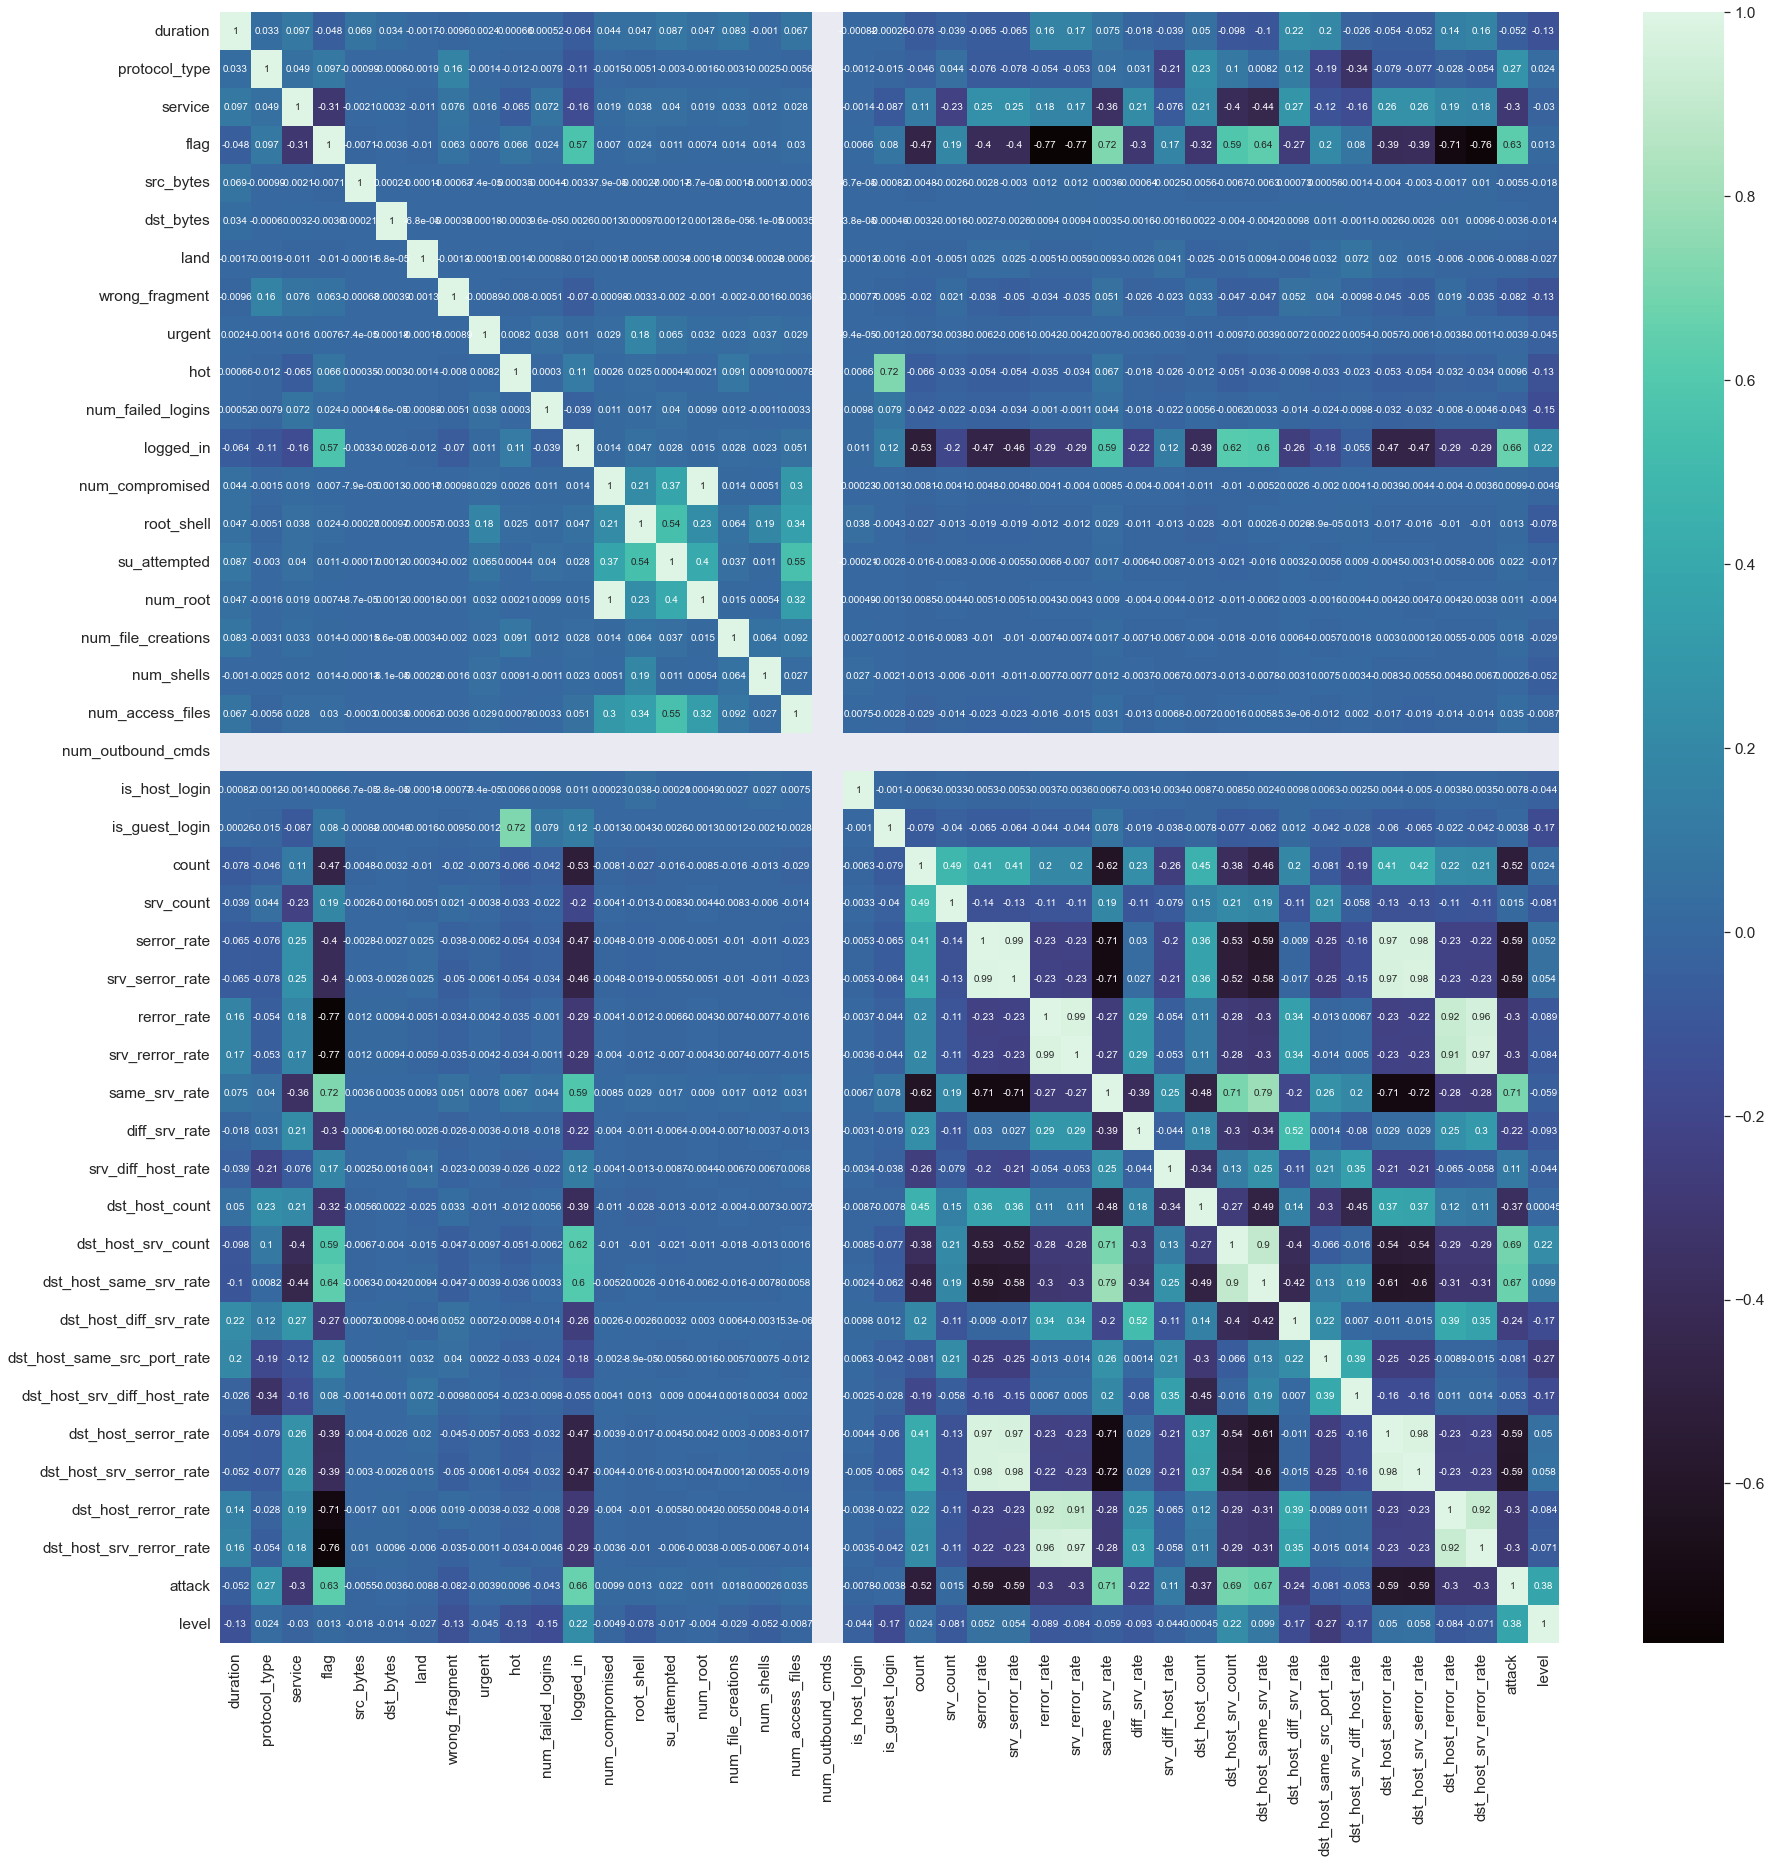

In [69]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True,cmap='mako')

In [70]:
# Assuming df is your DataFrame and 'attack' is your target variable
x = df.drop('attack', axis=1)
y = df['attack']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',y_train.shape)
print(f'Testing Shape y:',y_test.shape)

Training Shape x: (103961, 42)
Testing Shape x: (44556, 42)
*****___________*****___________*****
Training Shape y: (103961,)
Testing Shape y: (44556,)


In [71]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy : 0.9642472394290331
Train accuracy =96.53%
Test accuracy =96.42%
[[20741   713]
 [  880 22222]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21454
           1       0.97      0.96      0.97     23102

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556

Accuracy: 0.9642472394290331
Precision: 0.9689121430128624
Recall: 0.961908059908233
F1 Score: 0.9642472394290331
MCC: 0.9284425396074985
*******************************************
[[20741   713]
 [  880 22222]]
*******************************************


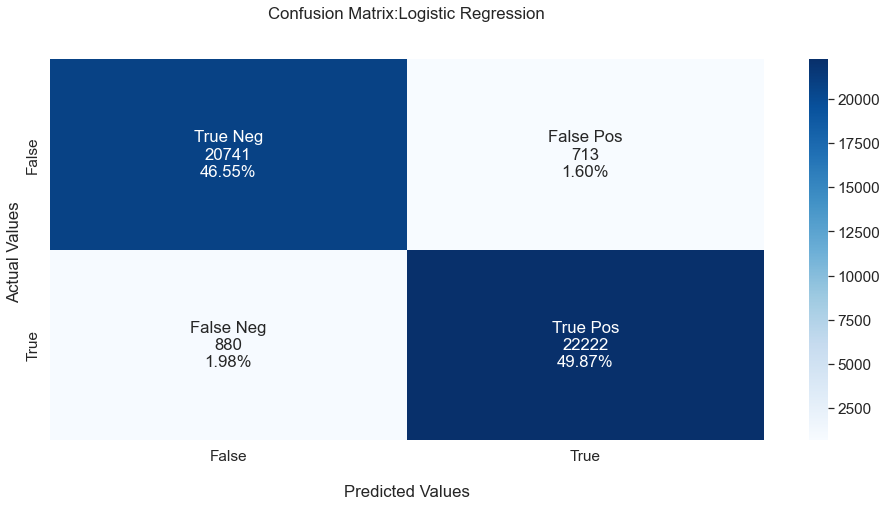

*******************************************
AUC = 0.964


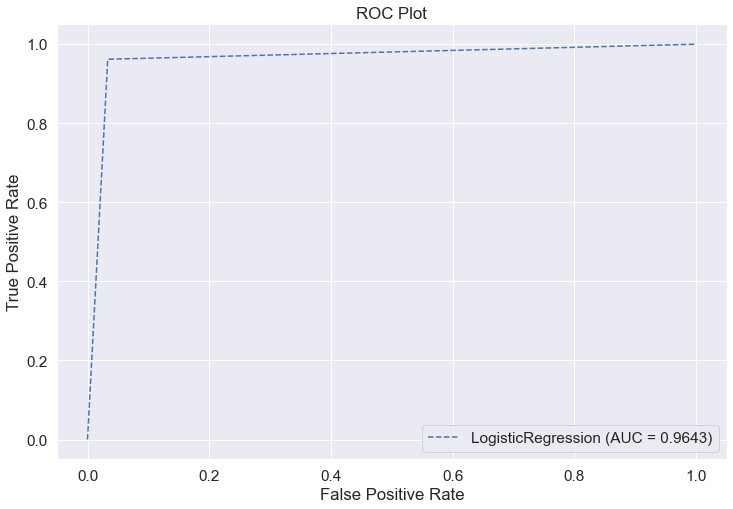

In [72]:
#Applying LogisticRegression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)
print('Accuracy :', accuracy_score(y_test, predictions1))
print ("Train accuracy ={:.2f}%".format(model1.score(X_train, y_train)*100))
print ("Test accuracy ={:.2f}%".format(model1.score(X_test,y_test)*100))
#Predict test data set
y_pred_log =model1.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_log))


#Checking performance our model with classification report
print(classification_report(y_test, y_pred_log))

#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_scor(y_test, y_pred_log))
print(F'Precision:', precision_score(y_test, y_pred_log))
print(F'Recall:', recall_score(y_test, y_pred_log))
print(F'F1 Score:', f1_score(y_test, y_pred_log,average="micro"))
print(F'MCC:', matthews_corrcoef(y_test, y_pred_log))

print('*******************************************')



conf_matrix = confusion_matrix(y_test, y_pred_log)
print(conf_matrix)

print('*******************************************')
# Plot confusion matrix
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)

#print('*******************************************')

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix:Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



print('*******************************************')


lr_auc = roc_auc_score(y_test, predictions1)
print('AUC = %.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions1)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='LogisticRegression (AUC = %0.4f)' % lr_auc)



plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

Accuracy : 0.8875123440165186
Train accuracy =88.91%
Test accuracy =88.75%
[[19018  2436]
 [ 2576 20526]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     21454
           1       0.89      0.89      0.89     23102

    accuracy                           0.89     44556
   macro avg       0.89      0.89      0.89     44556
weighted avg       0.89      0.89      0.89     44556

Accuracy: 0.8875123440165186
Precision: 0.8939116801672328
Recall: 0.888494502640464
F1 Score: 0.8875123440165186
MCC: 0.7747842460082289
*******************************************
[[19018  2436]
 [ 2576 20526]]
*******************************************


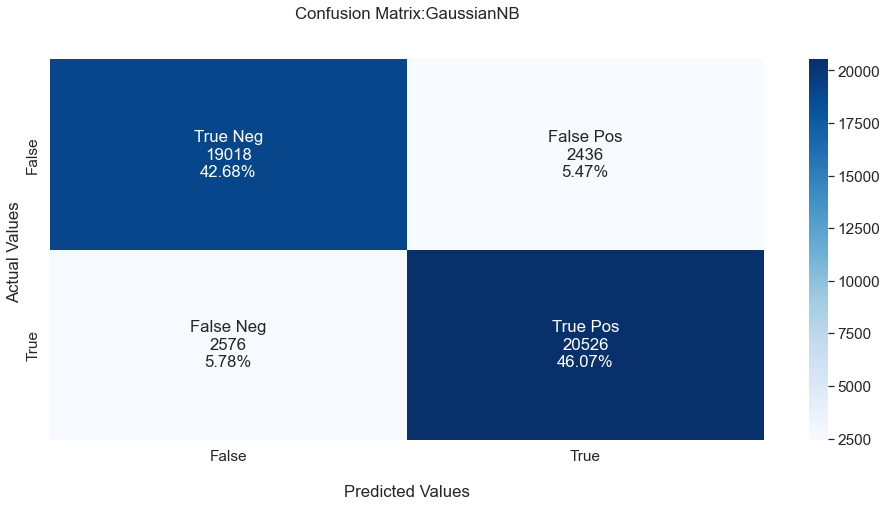

*******************************************
AUC = 0.887


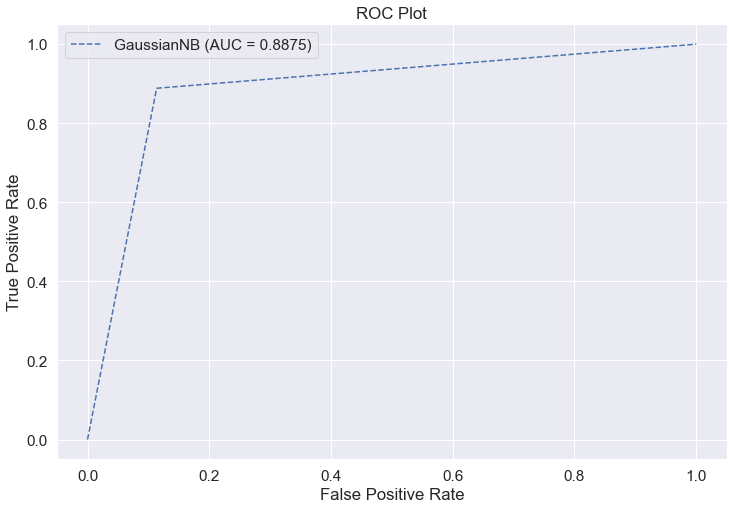

In [73]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
print('Accuracy :', accuracy_score(y_test, predictions2))
print ("Train accuracy ={:.2f}%".format(model2.score(X_train, y_train)*100))
print ("Test accuracy ={:.2f}%".format(model2.score(X_test,y_test)*100))
#Predict test data set
y_pred_NB =model2.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_NB))


#Checking performance our model with classification report
print(classification_report(y_test, y_pred_NB))

#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_scor(y_test, y_pred_NB))
print(F'Precision:', precision_score(y_test, y_pred_NB))
print(F'Recall:', recall_score(y_test, y_pred_NB))
print(F'F1 Score:', f1_score(y_test, y_pred_NB,average="micro"))
print(F'MCC:', matthews_corrcoef(y_test,y_pred_NB))

print('*******************************************')



conf_matrix = confusion_matrix(y_test, y_pred_NB)
print(conf_matrix)

print('*******************************************')
# Plot confusion matrix
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix:GaussianNB\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


print('*******************************************')


NB_auc = roc_auc_score(y_test, predictions2)
print('AUC = %.3f' % (NB_auc))
NB_fpr, NB_tpr, _ = roc_curve(y_test, predictions2)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(NB_fpr, NB_tpr, linestyle='--', label='GaussianNB (AUC = %0.4f)' % NB_auc)



plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()


Accuracy : 0.9676811203878266
Train accuracy =96.81%
Test accuracy =96.77%
[[20972   482]
 [  958 22144]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21454
           1       0.98      0.96      0.97     23102

    accuracy                           0.97     44556
   macro avg       0.97      0.97      0.97     44556
weighted avg       0.97      0.97      0.97     44556

Accuracy: 0.9676811203878266
Precision: 0.9679202263612298
Recall: 0.9676811203878266
F1 Score: 0.9676811203878266
MCC: 0.9355386918141633
*******************************************
[[20972   482]
 [  958 22144]]
*******************************************


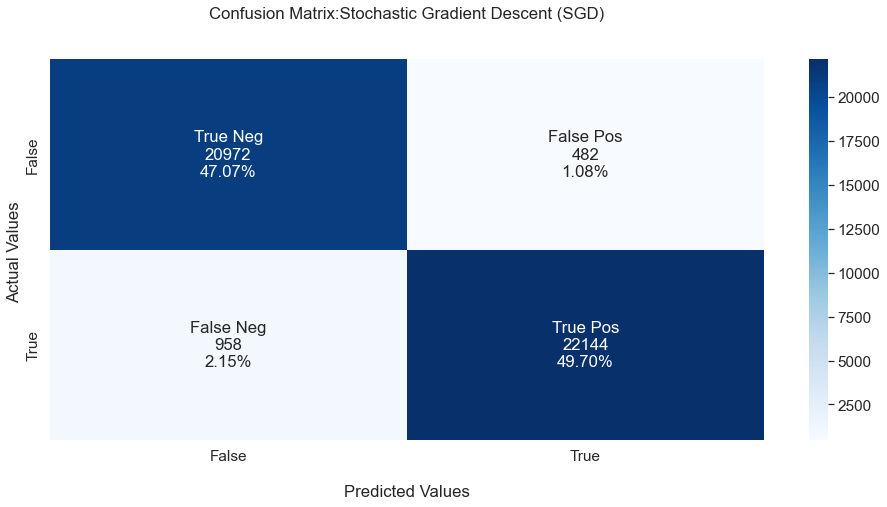

*******************************************
AUC = 0.968


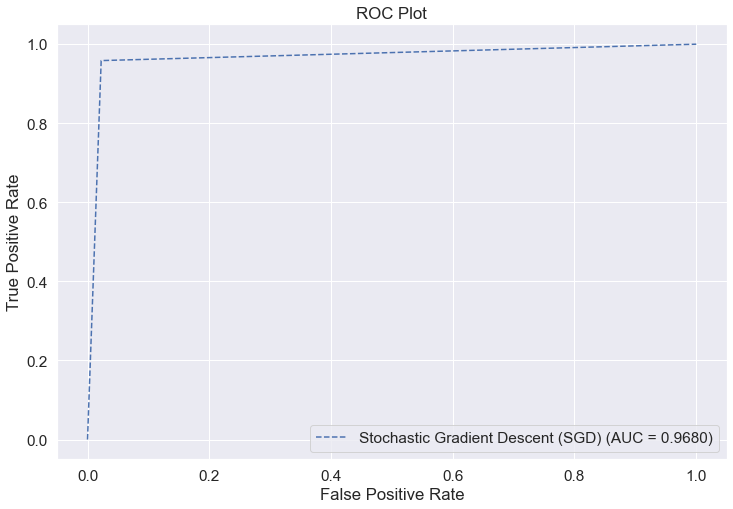

In [74]:
#Applying Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

model3 = SGDClassifier()


model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)

print('Accuracy :', accuracy_score(y_test, predictions3))


print ("Train accuracy ={:.2f}%".format(model3.score(X_train, y_train)*100))
print ("Test accuracy ={:.2f}%".format(model3.score(X_test,y_test)*100))


from sklearn.metrics import *
#Predict test data set
y_pred_SGDC=model3.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_SGDC))

#Checking performance our model with classification report
print(classification_report(y_test, y_pred_SGDC))

#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_scor(y_test, y_pred_SGDC))
print(F'Precision:', precision_score(y_test, y_pred_SGDC,average="weighted"))
print(F'Recall:', recall_score(y_test, y_pred_SGDC,average="weighted"))
print(F'F1 Score:', f1_score(y_test, y_pred_SGDC,average="micro"))
print(F'MCC:', matthews_corrcoef(y_test, y_pred_SGDC))
print('*******************************************')



conf_matrix = confusion_matrix(y_test, y_pred_SGDC)
print(conf_matrix)

print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix:Stochastic Gradient Descent (SGD)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


print('*******************************************')



from sklearn.metrics import roc_curve, roc_auc_score

SGD_auc = roc_auc_score(y_test, predictions3)
print('AUC = %.3f' % (SGD_auc))
SGD_fpr, SGD_tpr, _ = roc_curve(y_test, predictions3)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(SGD_fpr, SGD_tpr, linestyle='--', label='Stochastic Gradient Descent (SGD) (AUC = %0.4f)' % SGD_auc)



plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()


Accuracy : 0.9622946404524643
Train accuracy =96.29%
Test accuracy =96.23%
[[20610   844]
 [  836 22266]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21454
           1       0.96      0.96      0.96     23102

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556

Accuracy: 0.9622946404524643
Precision: 0.9634790134141065
Recall: 0.9638126569128214
F1 Score: 0.963645806284082
MCC: 0.9244850293331063
*******************************************
[[20610   844]
 [  836 22266]]
*******************************************


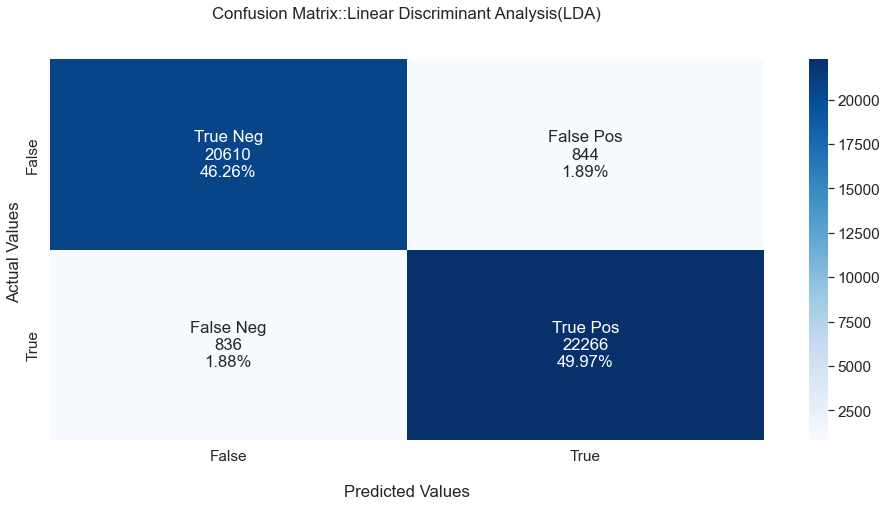

*******************************************
AUC = 0.962


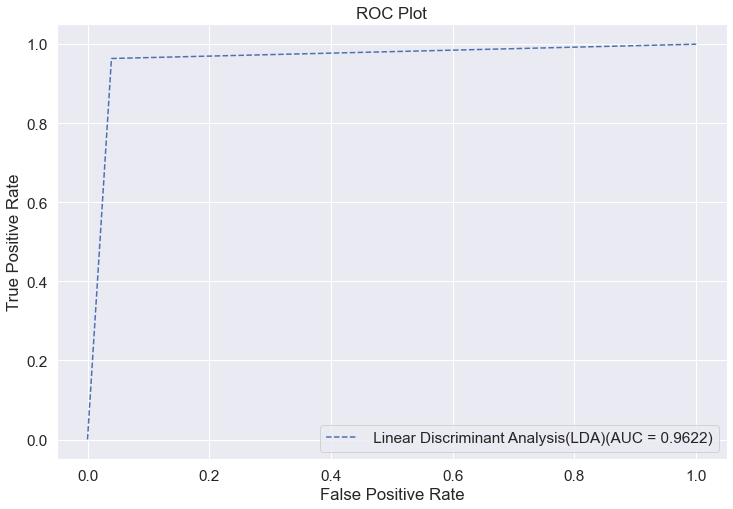

In [33]:
#Applying Linear Discriminant Analysis Classifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model4 = LinearDiscriminantAnalysis()

model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)

print('Accuracy :', accuracy_score(y_test, predictions4))


print ("Train accuracy ={:.2f}%".format(model4.score(X_train, y_train)*100))
print ("Test accuracy ={:.2f}%".format(model4.score(X_test,y_test)*100))


from sklearn.metrics import *
#Predict test data set
y_pred_LDA=model4.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_LDA))

#Checking performance our model with classification report
print(classification_report(y_test, y_pred_LDA))

#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_scor(y_test, y_pred_LDA))
print(F'Precision:', precision_score(y_test, y_pred_LDA))
print(F'Recall:', recall_score(y_test, y_pred_LDA))
print(F'F1 Score:', f1_score(y_test, y_pred_LDA))
print(F'MCC:', matthews_corrcoef(y_test, y_pred_LDA))
print('*******************************************')



conf_matrix = confusion_matrix(y_test, y_pred_LDA)
print(conf_matrix)

print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix::Linear Discriminant Analysis(LDA)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


print('*******************************************')


LDA_auc = roc_auc_score(y_test, predictions4)
print('AUC = %.3f' % (LDA_auc))
LDA_fpr, LDA_tpr, _ = roc_curve(y_test, predictions4)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(LDA_fpr, LDA_tpr, linestyle='--', label=' Linear Discriminant Analysis(LDA)(AUC = %0.4f)' % LDA_auc)



plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()


Train accuracy =100.00%
Test accuracy : 0.9985636053505701
[[21424    30]
 [   34 23068]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21454
           1       1.00      1.00      1.00     23102

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556

Accuracy: 0.9985636053505701
Precision: 0.9987011862498918
Recall: 0.9985282659509999
F1 Score: 0.9986147186147185
MCC: 0.9971233104441831
*******************************************
*******************************************
[[21424    30]
 [   34 23068]]
*******************************************


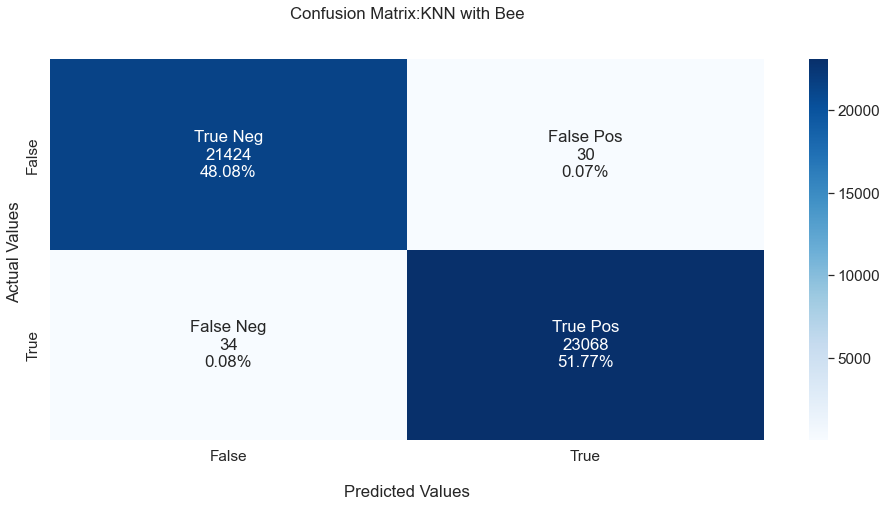

*******************************************
AUC = 0.999


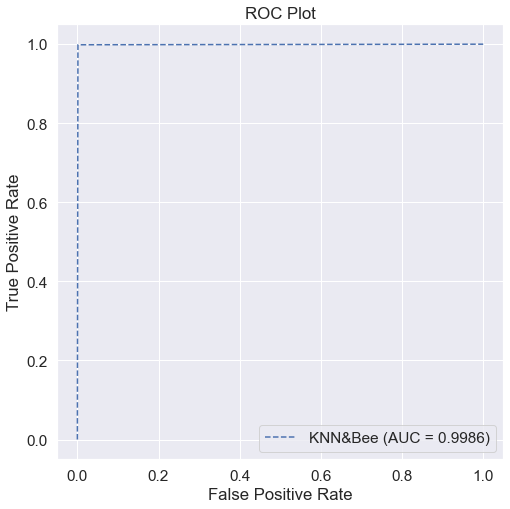

In [34]:
#Applying KNeighborsClassifier with Bee

from sklearn.neighbors import KNeighborsClassifier

#Bee Algorithm for KNN hyperparameter optimization
class Bee:
    def __init__(self, n_neighbors, metric):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.fitness = None
        
#'''
#Bee Class: Each Bee instance represents a potential solution with specific KNN hyperparameters (n_neighbors and metric).

#n_neighbors: Number of neighbors to consider for the KNN algorithm.

#metric: Distance metric used for the KNN algorithm.

#fitness: Accuracy score of the model with these hyperparameters


#'''

def evaluate_bee(bee, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=bee.n_neighbors, metric=bee.metric)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    bee.fitness = accuracy_score(y_test, predictions)
    return bee.fitness



#'''
#evaluate_bee Function: This function evaluates a bee's fitness by training a KNN model with 
#the bee's hyperparameters and calculating the accuracy score on the test set.

#Fits the KNN model using X_train and y_train.

#Predicts the labels for X_test.

#Calculates the accuracy score using accuracy_score.

#Updates the bee's fitness with the accuracy score.

#'''

def bee_algorithm(X_train, X_test, y_train, y_test, n_bees=15, n_iterations=15):
    metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    bees = [Bee(np.random.randint(1, 50), str(np.random.choice(metrics))) for _ in range(n_bees)]
    
    for _ in range(n_iterations):
        for bee in bees:
            evaluate_bee(bee, X_train, X_test, y_train, y_test)
        bees.sort(key=lambda b: b.fitness, reverse=True)
        best_bee = bees[0]
        for i in range(1, n_bees):
            if np.random.rand() < 0.5:
                bees[i] = Bee(best_bee.n_neighbors, best_bee.metric)
                bees[i].n_neighbors += np.random.randint(-5, 5)
                bees[i].n_neighbors = max(1, bees[i].n_neighbors)
                bees[i].metric = str(np.random.choice(metrics))
    return best_bee

#'''
#bee_algorithm Function: This function optimizes the KNN hyperparameters using a swarm of bees over a number of iterations.

#Initialization:
#metrics: List of possible distance metrics.
#bees: List of Bee objects initialized with random n_neighbors (between 1 and 50) and random metric.


#Main Loop (for each iteration):
#Evaluates each bee’s fitness using evaluate_bee.

#Sorts the bees by fitness in descending order.

#Selects the best bee (highest fitness) as best_bee.

#Updates the other bees based on the best bee with a probability of 0.5:
#Copies n_neighbors and metric from the best bee.
#Modifies n_neighbors by a random value between -5 and 5, ensuring it stays at least 1.
#Randomly selects a new metric.

#'''


# Run Bee Algorithm for hyperparameter optimization
best_bee = bee_algorithm(X_train, X_test, y_train, y_test)

#'''
#The Bee Algorithm implemented here simulates a swarm intelligence approach for hyperparameter optimization of a KNN classifier.
#Each bee represents a potential solution (set of hyperparameters).
#The algorithm iteratively evaluates, sorts, and updates the bees to converge towards an optimal set of hyperparameters. 
#The goal is to maximize the accuracy of the KNN classifier on the test set.
#'''


# Train KNN with best parameters
model15 = KNeighborsClassifier(n_neighbors=best_bee.n_neighbors, metric=best_bee.metric)
model15.fit(X_train, y_train)
predictions15 = model15.predict(X_test)

# Print accuracy
print("Train accuracy ={:.2f}%"format(model15.score(X_train, y_train)*100))
print('Test accuracy :', accuracy_score(y_test, predictions15))

# Predict test data set
y_pred_KNN = model15.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print(conf_matrix)

# Classification report
print(classification_report(y_test, y_pred_KNN))

# Print metrics
print('Accuracy:', accuracy_score(y_test, y_pred_KNN))
print('Precision:', precision_score(y_test, y_pred_KNN))
print('Recall:', recall_score(y_test, y_pred_KNN))
print('F1 Score:', f1_score(y_test, y_pred_KNN))
print('MCC:', matthews_corrcoef(y_test, y_pred_KNN))
print('*******************************************')

print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print(conf_matrix)

print('*******************************************')
# Plot confusion matrix
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix:KNN with Bee\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print('*******************************************')


auc = roc_auc_score(y_test, predictions15)
print('AUC = %.3f' % (auc))
bee_fpr, bee_tpr, _ = roc_curve(y_test, predictions15)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(bee_fpr, bee_tpr, linestyle='--', label='KNN&Bee (AUC = %0.4f)' %auc)



plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

# LSTM-Model

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 42, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 42, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 42, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

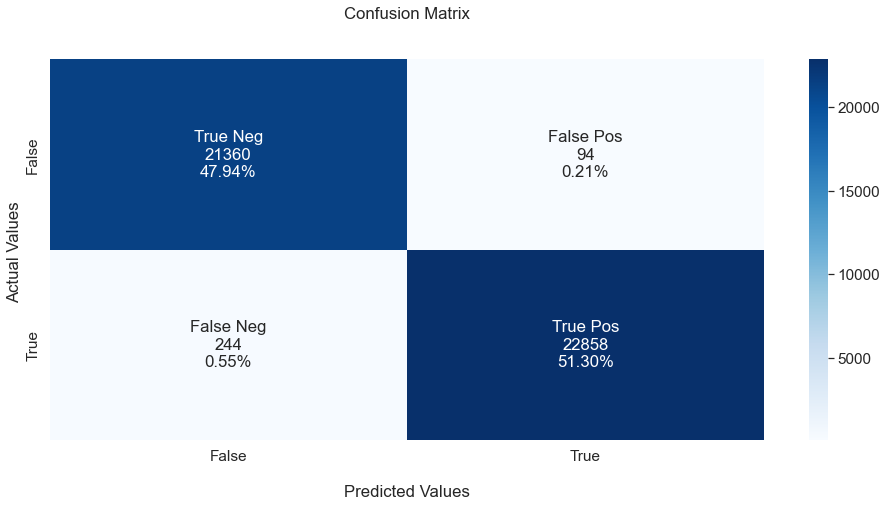

*******************************************


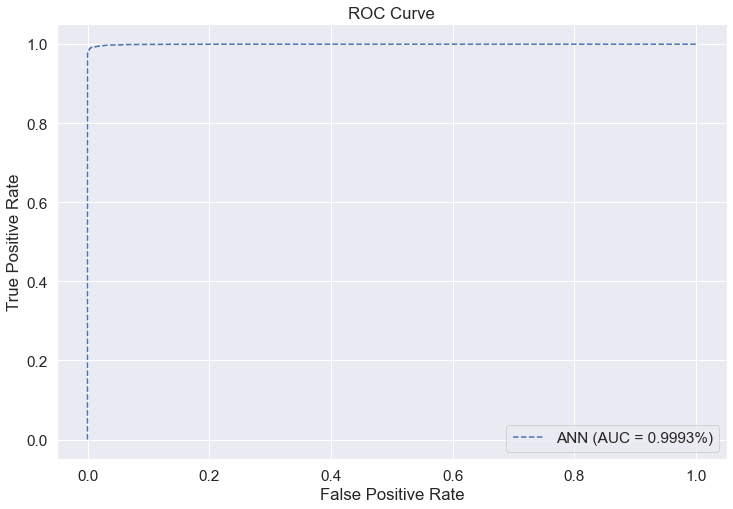

In [35]:
model_1 = Sequential(name="LSTM-Model") # Model
model_1.add(LSTM(units = 128, input_shape = (42,1), return_sequences=True))
model_1.add(LSTM(units = 64, return_sequences=True))
model_1.add(Dropout(0.01))
model_1.add(LSTM(32))
model_1.add(Flatten())
model_1.add(Dense(units = 32, activation='relu'))
model_1.add(Dropout(0.01))
model_1.add(Dense(units = 1))
model_1.add(Activation('sigmoid'))
model_1.summary()

# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_1.fit(X_train, y_train, epochs=10,batchsize=256,validation_data=(X_test,y_test), verbose=1, shuffle=False)

# Evaluate the model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model_1.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)  # Convert predictions to binary

# Calculate various metrics
#accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred_prob)

# Print metrics
#print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc1}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix
plt.show()

print('*******************************************')

# ROC curve and AUC
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr1, tpr1, linestyle='--', label='ANN (AUC = 0.9993%)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# CNN-Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           512       
                                                                 
 average_pooling1d (AverageP  (None, 20, 128)          0         
 ooling1D)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 20, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 2560)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               327808    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                        

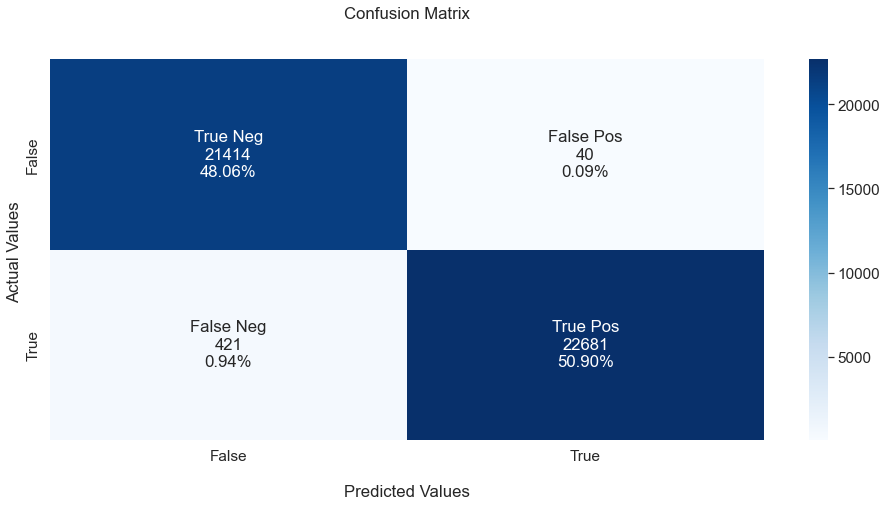

*******************************************


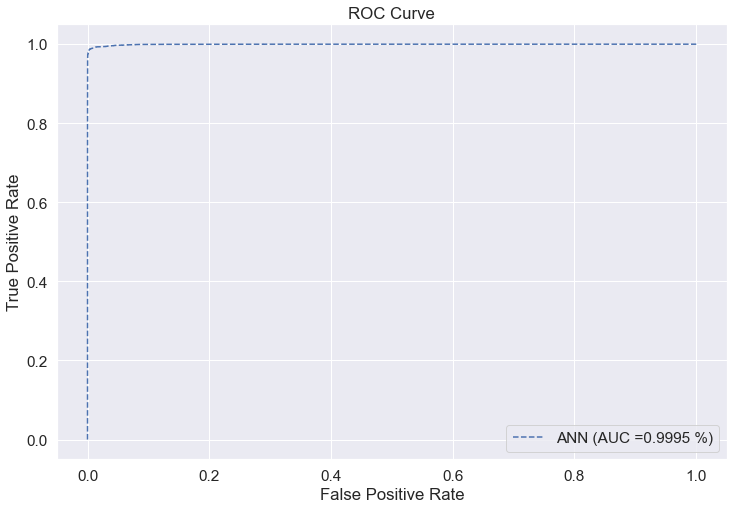

In [36]:

model_2 = Sequential()
model_2.add(Conv1D(128, 3, activation='relu', input_shape=(42,1)))
model_2.add(AveragePooling1D(pool_size=2) )
model_2.add(Dropout(0.75))
model_2.add(Flatten())
model_2.add(Dense(units = 128, activation='relu'))
model_2.add(Dropout(0.75))

model_2.add(Dense(units = 1))
model_2.add(Activation('sigmoid'))

model_2.summary()


# Compile the model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_2.fit(X_train, y_train, epochs=10,batchsize=256,validation_data=(X_test,y_test), verbose=1, shuffle=False)

# Evaluate the model
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model_2.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)  # Convert predictions to binary

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc2}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix
plt.show()

print('*******************************************')

# ROC curve and AUC
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr2, tpr2, linestyle='--', label='ANN (AUC =0.9995 %)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# ANN-1-Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              43000     
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 750)               750750    
                                                                 
 dropout_5 (Dropout)         (None, 750)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 750)              3000      
 hNormalization)                                      

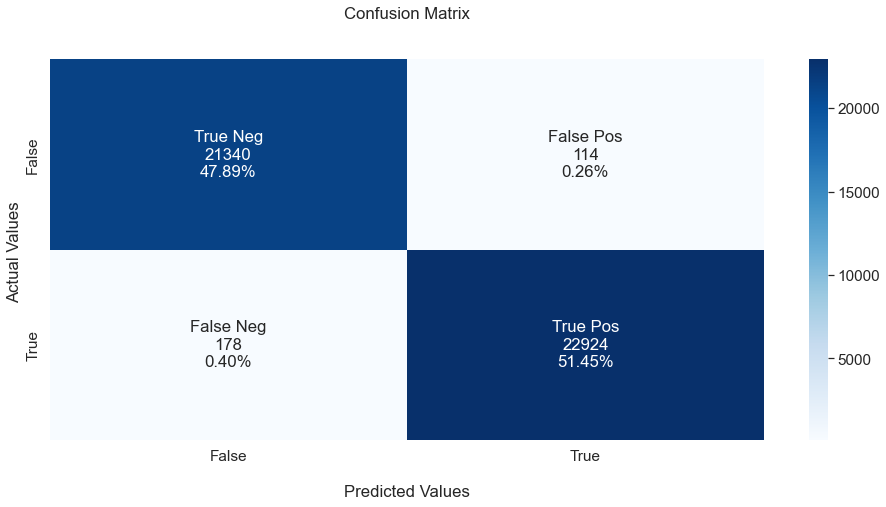

*******************************************


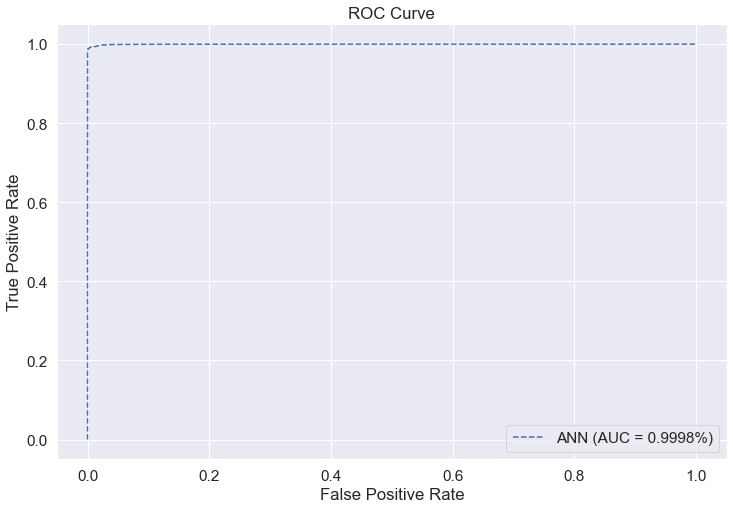

In [37]:
# Create the ANN model
#Model Architecture
from keras.constraints import maxnorm
model_3 = Sequential()
model_3.add(Dense(1000, activation='relu', input_shape=(42,), kernel_constraint=maxnorm(42)))
model_3.add(Dropout(0.7))
model_3.add(BatchNormalization())

model_3.add(Dense(750, activation='relu', kernel_constraint=maxnorm(42)))
model_3.add(Dropout(0.7))
model_3.add(BatchNormalization())

model_3.add(Dense(500, activation='relu', kernel_constraint=maxnorm(42)))
model_3.add(Dropout(0.7))
model_3.add(BatchNormalization())

model_3.add(Dense(250, activation='relu', kernel_constraint=maxnorm(42)))
model_3.add(Dropout(0.7))
model_3.add(BatchNormalization())

model_3.add(Dense(50, activation='relu', kernel_constraint=maxnorm(42)))
model_3.add(Dropout(0.7))
model_3.add(BatchNormalization())

model_3.add(Dense(1, activation='sigmoid' , kernel_constraint=maxnorm(42)))
model_3.summary()


# Compile the model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_3.fit(X_train, y_train, epochs=10,batchsize=256,validation_data=(X_test,y_test), verbose=1, shuffle=False)

# Evaluate the model
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model_3.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)  # Convert predictions to binary

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc3}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix
plt.show()

print('*******************************************')

# ROC curve and AUC
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr3, tpr3, linestyle='--', label='ANN (AUC = 0.9998%)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ANN-2-Model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              43000     
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 750)               750750    
                                                                 
 dropout_10 (Dropout)        (None, 750)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 750)              3000      
 hNormalization)                                      

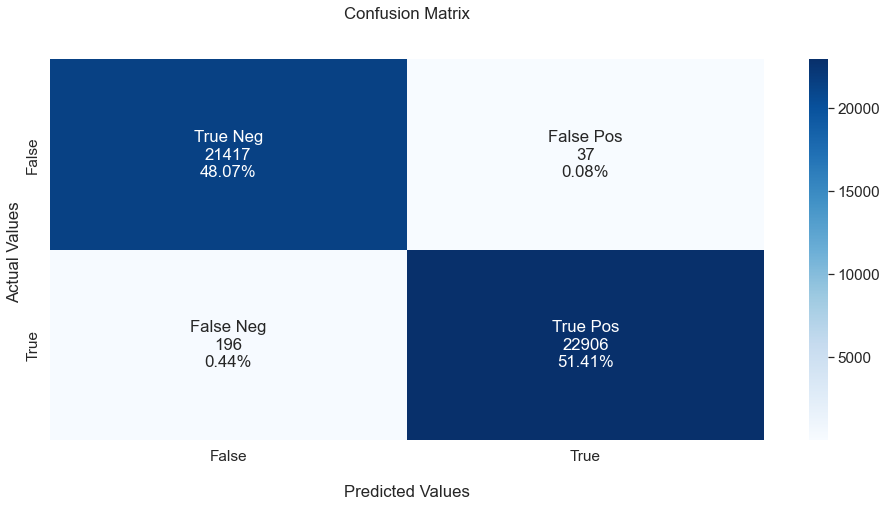

*******************************************


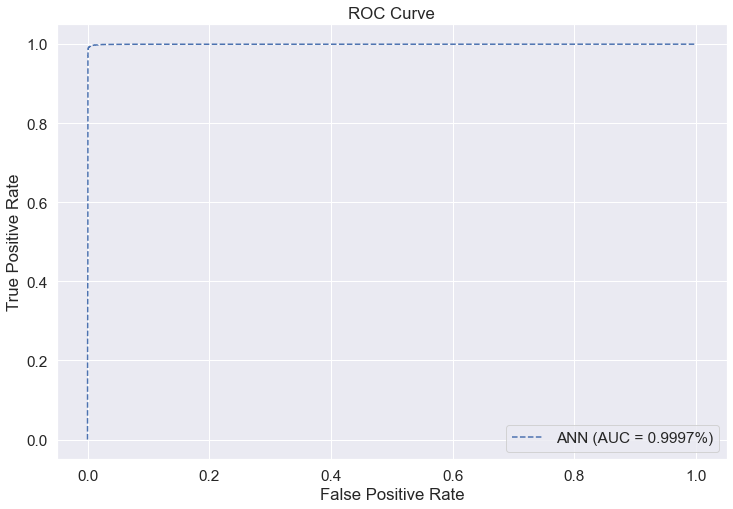

In [38]:
# Create the ANN model
#Model Architecture
from keras.constraints import maxnorm
model_4 = Sequential()
model_4.add(Dense(1000, activation='relu', input_shape=(42), kernel_constraint=maxnorm(42)))
model_4.add(Dropout(0.7))
model_4.add(BatchNormalization())

model_4.add(Dense(750, activation='relu', kernel_constraint=maxnorm(42)))
model_4.add(Dropout(0.7))
model_4.add(BatchNormalization())


model_4.add(Dense(1, activation='sigmoid' , kernel_constraint=maxnorm(42)))
model_4.summary()


# Compile the model
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_4.fit(X_train, y_train, epochs=10,batchsize=256,validation_data=(X_test,y_test), verbose=1, shuffle=False)

# Evaluate the model
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model_4.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)  # Convert predictions to binary

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc4}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix
plt.show()

print('*******************************************')

# ROC curve and AUC
fpr4, tpr4, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr4, tpr4, linestyle='--', label='ANN (AUC = 0.9997%)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# RNN-Model

Model: "RNN-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 42, 128)           16640     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 42, 64)            12352     
                                                                 
 dropout_11 (Dropout)        (None, 42, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0 

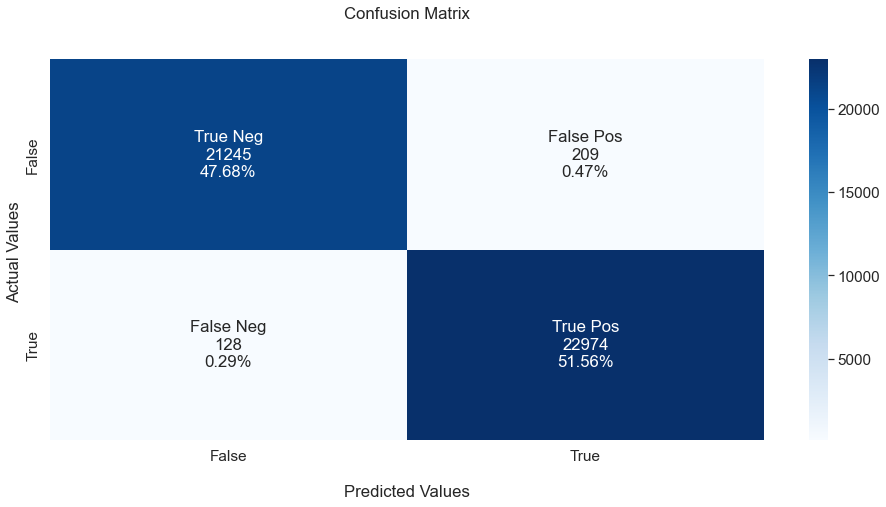

*******************************************


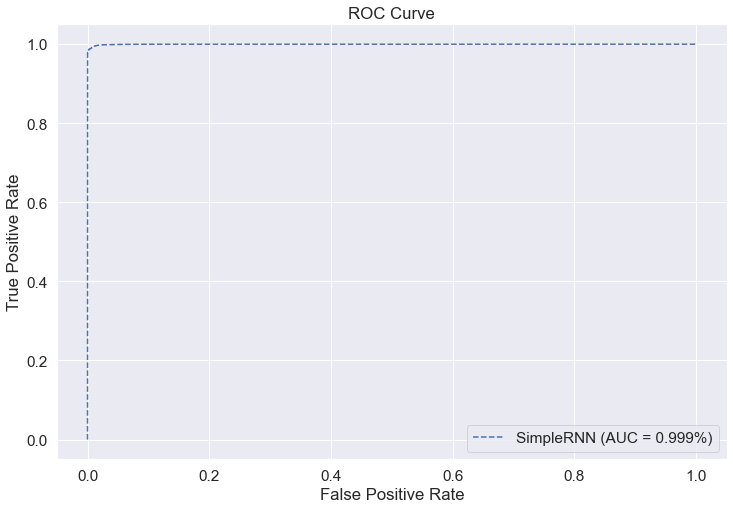

In [40]:
# Define the model using RNN
model_5 = Sequential(name="RNN-Model")
model_5.add(SimpleRNN(units=128, input_shape=(42, 1), return_sequences=True))
model_5.add(SimpleRNN(units=64, return_sequences=True))
model_5.add(Dropout(0.01))
model_5.add(SimpleRNN(32))
model_5.add(Flatten())
model_5.add(Dense(units=32, activation='relu'))
model_5.add(Dropout(0.01))
model_5.add(Dense(units=1))
model_5.add(Activation('sigmoid'))
model_5.summary()

# Compile the model
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_5.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# Evaluate the model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model_5.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)  # Convert predictions to binary

# Calculate various metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc5}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix
plt.show()

print('*******************************************')

# ROC curve and AUC
fpr5, tpr5, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr5, tpr5, linestyle='--', label='SimpleRNN (AUC = 0.999%)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Model: "GRU-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 42, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 42, 64)            37248     
                                                                 
 dropout_13 (Dropout)        (None, 42, 64)            0         
                                                                 
 flatten_3 (Flatten)         (None, 2688)              0         
                                                                 
 dense_15 (Dense)            (None, 32)                86048     
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 33

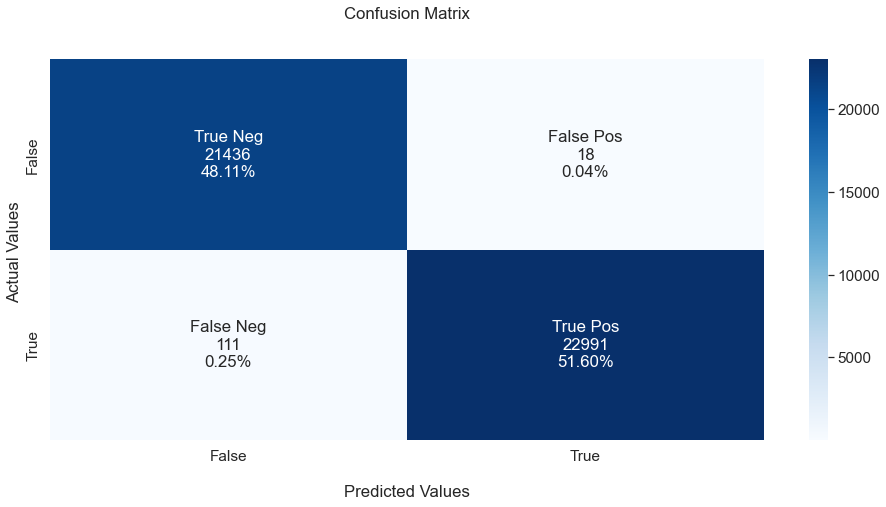

*******************************************


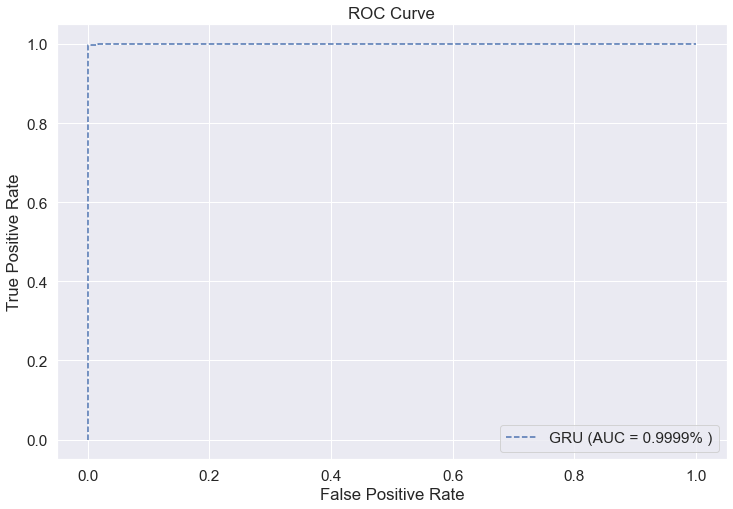

In [41]:
# Define the model using GRU
model_gru = Sequential(name="GRU-Model")
model_gru.add(GRU(units=128, input_shape=(42, 1), return_sequences=True))
model_gru.add(GRU(units=64, return_sequences=True))
model_gru.add(Dropout(0.03))
model_gru.add(Flatten())
model_gru.add(Dense(units=32, activation='relu'))
model_gru.add(Dropout(0.03))
model_gru.add(Dense(units=1))
model_gru.add(Activation('sigmoid'))
model_gru.summary()

# Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_gru.fit(X_train, y_train, epochs=10, batchsize=256, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# Evaluate the model
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model_gru.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)  # Convert predictions to binary

# Calculate various metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc_gru = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"ROC AUC Score: {roc_auc_gru}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix
plt.show()

print('*******************************************')

# ROC curve and AUC
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr_gru, tpr_gru, linestyle='--', label='GRU (AUC = 0.9999% )')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
